# Arbol de decisión para especies de flores

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\Cesar Aaron\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
data = pd.read_csv('../datasets/iris/iris.csv')
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
data.shape

(150, 5)

(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

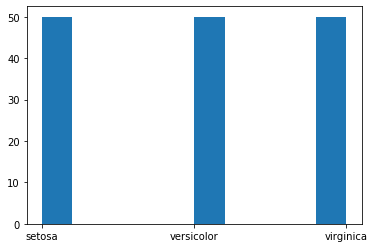

In [6]:
plt.hist(data.Species)

In [7]:
data.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [8]:
colnames = data.columns.values.tolist()
predictors = colnames[:4]
target = colnames[4]

In [9]:
import numpy as np

In [10]:
data['is_train'] = np.random.uniform(0,1,len(data)) < 0.75

In [11]:
train, test = data[data['is_train'] == True] , data[data['is_train'] == False]

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
tree = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 20,random_state = 99)

In [14]:
tree.fit(train[predictors], train[target])

DecisionTreeClassifier(criterion='entropy', min_samples_split=20,
                       random_state=99)

In [15]:
preds = tree.predict(test[predictors])

In [16]:
pd.crosstab(test[target], preds, rownames = ['Actual'], colnames = ['Predictions'])

Predictions,setosa,versicolor,virginica
Actual,,,
setosa,16,0,0
versicolor,0,10,0
virginica,0,1,12


## Visualizacion del árbol de decisión

In [17]:
from sklearn.tree import export_graphviz

In [18]:
with open('../resources/iris_dtree.dot','w') as dotfile:
    export_graphviz(tree, out_file = dotfile, feature_names = predictors)
    dotfile.close()

In [19]:
import os
from graphviz import Source

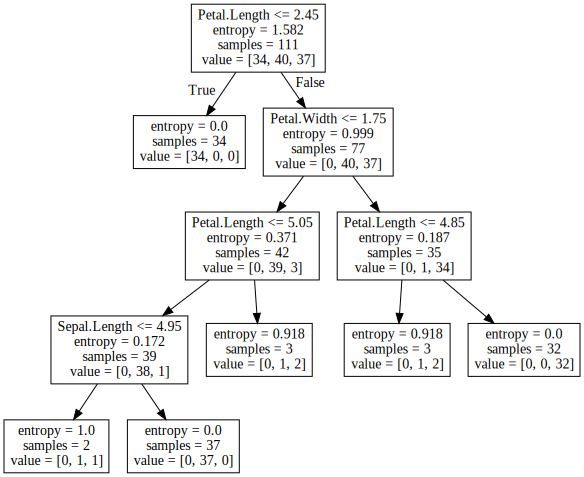

In [20]:
file = open('../resources/iris_dtree.dot','r')
text = file.read()
Source(text)

# Cross Validation poda del arbol

In [21]:
X = data[predictors]
Y = data[target]

In [22]:
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, min_samples_split = 20, random_state = 99)
tree.fit(X,Y)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=20,
                       random_state=99)

In [23]:
from sklearn.model_selection import KFold

In [24]:
cv = KFold(n_splits = 10, shuffle = True, random_state = 1)

In [25]:
from sklearn.model_selection import cross_val_score

In [26]:
score = np.mean(cross_val_score(tree, X, Y, scoring = 'accuracy', cv = cv, n_jobs = 1))

In [27]:
score

0.9333333333333333

In [28]:
for i in range(1,11):
    tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = i, min_samples_split = 20, random_state = 99)
    tree.fit(X,Y)
    score = np.mean(cross_val_score(tree, X, Y, scoring = 'accuracy', cv = cv, n_jobs = 1))
    print('Score para i=',i,' es de ', score)
    print("   ", tree.feature_importances_)

Score para i= 1  es de  0.5666666666666667
    [0. 0. 1. 0.]
Score para i= 2  es de  0.9200000000000002
    [0.         0.         0.66620285 0.33379715]
Score para i= 3  es de  0.9400000000000001
    [0.         0.         0.68976981 0.31023019]
Score para i= 4  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i= 5  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i= 6  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i= 7  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i= 8  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i= 9  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i= 10  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]


In [29]:
predictors

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']

# Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
forest = RandomForestClassifier(n_jobs = 2, oob_score = True, n_estimators = 100)

In [37]:
forest.fit(X,Y)

RandomForestClassifier(n_jobs=2, oob_score=True)

In [38]:
forest.oob_decision_function_

array([[1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.93103448, 0.06896552, 0.        ],
       [0.96875   , 0.03125   , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.97058824, 0.02941176, 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.

In [39]:
forest.oob_score_

0.9533333333333334

# Parámetros importantes de Random Forest

* Tamaño del nodo (min_samples_leaf)
* Número de árboles(n_estimators)
* Número de predictores muestrados